# **Mall Customer Segmentation with K-Means**

---

> *BY*

**DOUGLAS, Unyime-Abasi**

In [ ]:
# Import libraries and modules for project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# Load dataset to new dataframe

file_path = '../data/Mall_Customers.csv'
df = pd.read_csv(file_path)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


**Observation:**

- No `null` values in the data

- We have customer data: `Gender`, `Age`, and `Annual Income range`

- Each customer is given `Customer ID` & `Spending Score`

In [ ]:
df.drop(columns='CustomerID').describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


**Observation:**

- Customers vary greatly by age group `(18-70 years)` and Income level `(15-137 k$)`

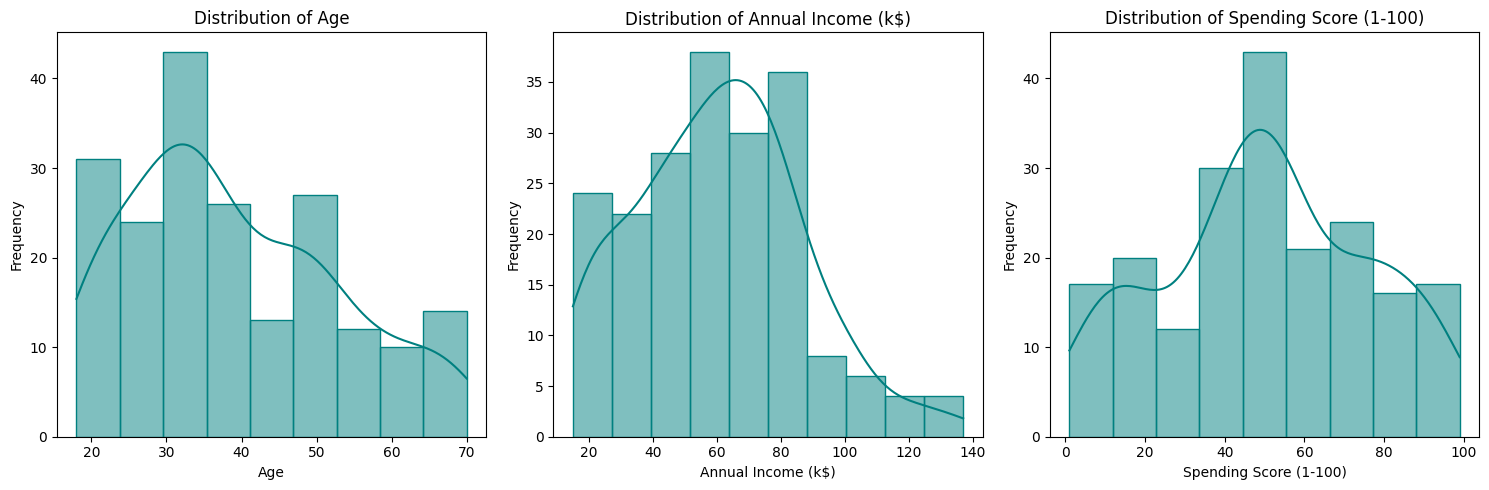

In [ ]:
# Visualize distribution of customer data

columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

plt.figure(figsize=(15, 5))
for i, col in enumerate(columns):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[col], color='teal', ec='teal', kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

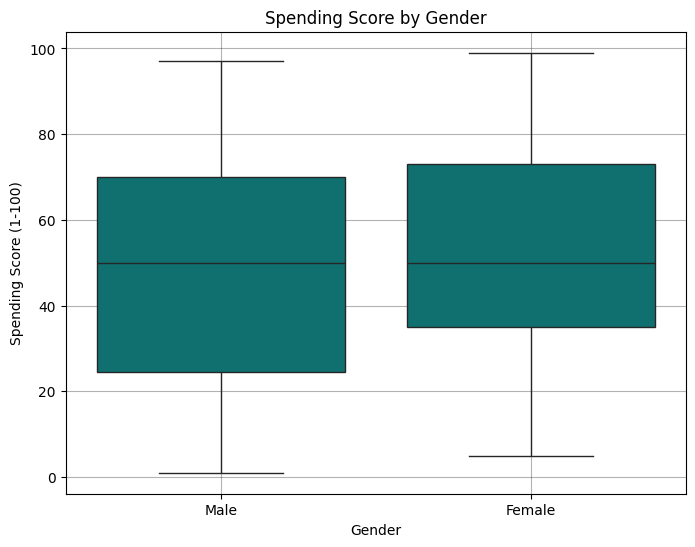

In [ ]:
# Visualize spending score by gender

plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df, color='teal')
plt.title('Spending Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')
plt.grid(True, color='k', alpha=0.3)
plt.show()

In [ ]:
df.groupby('Gender')['Spending Score (1-100)'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,112.0,51.526786,24.11495,5.0,35.0,50.0,73.0,99.0
Male,88.0,48.511364,27.89677,1.0,24.5,50.0,70.0,97.0


**Observation:**

- More customers are `Female`

- Slightly higher average spending score for females

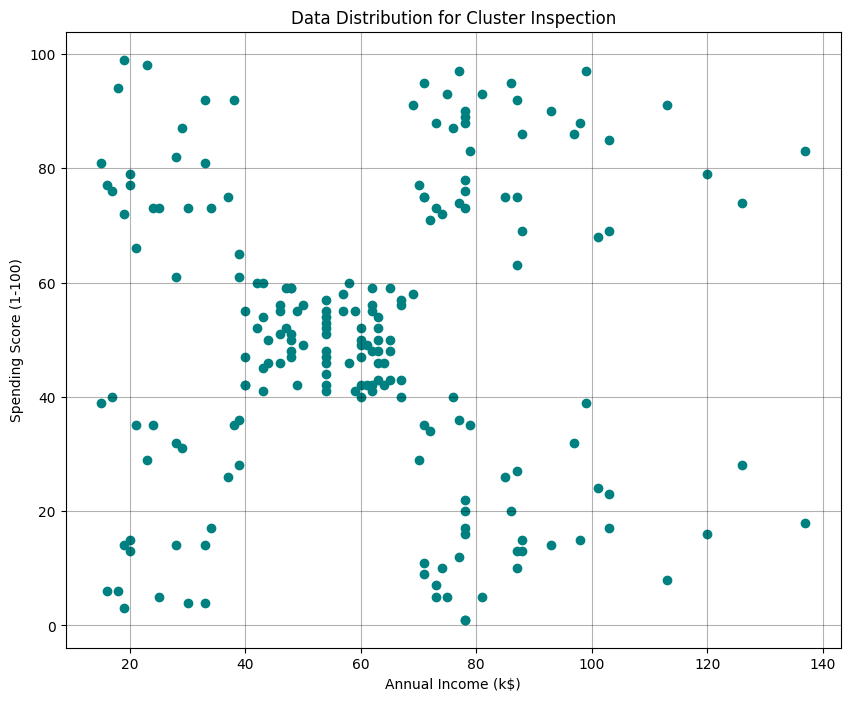

In [ ]:
# View customer spending clusters by annual income

plt.figure(figsize=(10, 8))
plt.scatter(x='Annual Income (k$)', y='Spending Score (1-100)',
            data=df, color='teal')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Data Distribution for Cluster Inspection')
plt.grid(True, color='k', alpha=0.3)
plt.show()

**Observation:**

There seems to be 3-5 customer segments.

**We** can accurately obtain the number of customer segments using methods like the `Elbow Method` and `Silhouette Analysis`

In [ ]:
# Create a new dataframe for cluster features

features = df[['Annual Income (k$)', 'Spending Score (1-100)']]
print("Shape of features dataframe:", features.shape, '\n')
features.head()

Shape of features dataframe: (200, 2) 



,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [ ]:
# Test different values for clusters (K)

k_range = range(2, 10)
wcss = [] # Within-Cluster Sum of Squares
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300,
                    n_init=10, random_state=70)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)
    print(f"K={k}: WCSS = {kmeans.inertia_:.2f}")

K=2: WCSS = 181363.60
K=3: WCSS = 106348.37
K=4: WCSS = 73679.79
K=5: WCSS = 44448.46
K=6: WCSS = 37233.81
K=7: WCSS = 30259.66
K=8: WCSS = 25028.02
K=9: WCSS = 21850.17


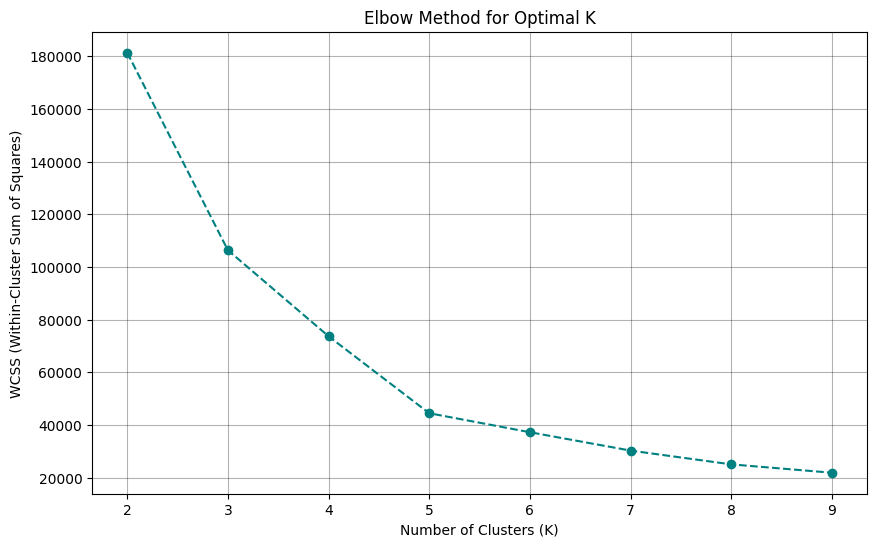

In [ ]:
# Plot the Elbow curve

plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--', color='teal')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(k_range)
plt.grid(True, color='k', alpha=0.3)
plt.show()

**Observation:**

The Elbow method indeed verifies 3-5 as an optimal range for the *k-value*

**We** will confirm this value using the `Silhouette Score`

In [ ]:
silhouette_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300,
                    n_init=10, random_state=70)
    kmeans.fit(features)
    labels = kmeans.labels_
    score = silhouette_score(features, labels)
    silhouette_scores.append(score)
    print(f"K={k}: Silhouette Score = {score:.4f}")

K=2: Silhouette Score = 0.2969
K=3: Silhouette Score = 0.4676
K=4: Silhouette Score = 0.4932
K=5: Silhouette Score = 0.5539
K=6: Silhouette Score = 0.5398
K=7: Silhouette Score = 0.5264
K=8: Silhouette Score = 0.4584
K=9: Silhouette Score = 0.4565


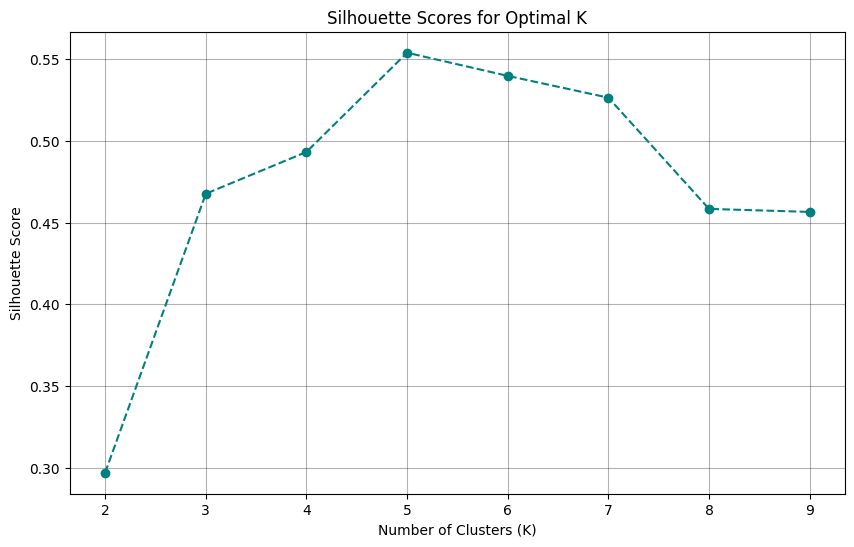

In [ ]:
# Plot Silhouette scores

plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--', color='teal')
plt.title('Silhouette Scores for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.grid(True, color='k', alpha=0.3)
plt.show()

**Observation:**

`5` has the highest *Silhouette score*, thus, is our optimal number of clusters

In [ ]:
# Create the final model
final_kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300,
                      n_init=10, random_state=70)

# Fit the model and get cluster labels
cluster_labels = final_kmeans.fit_predict(features)

# Add cluster labels to original dataframe
df_clustered = df.copy()
df_clustered['predicted_cluster'] = cluster_labels

In [ ]:
df_clustered.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),predicted_cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


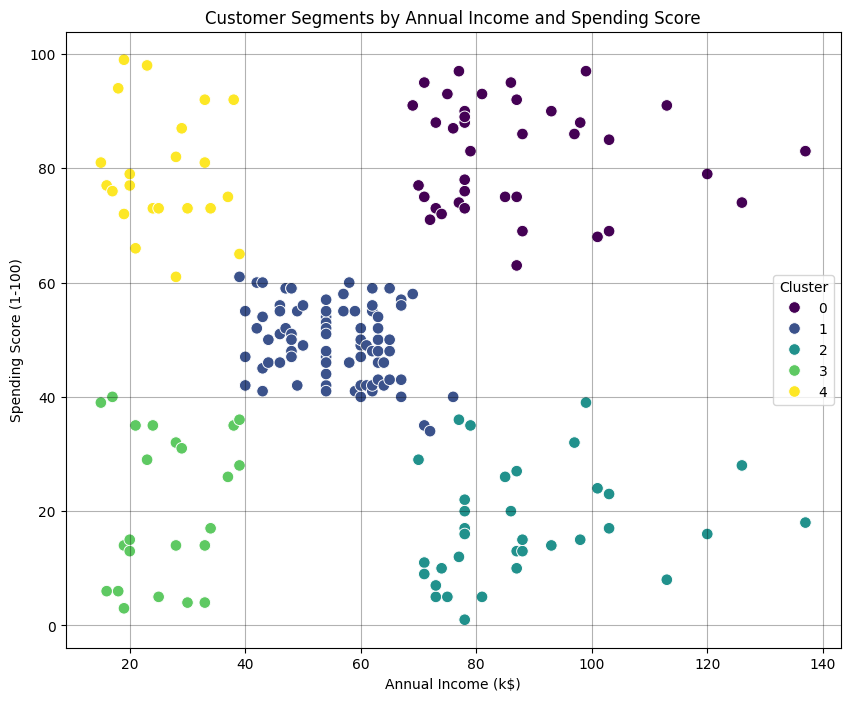

In [ ]:
# Visulaize the verified customer segments on a scatter plot

plt.figure(figsize=(10, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                data=df_clustered, hue='predicted_cluster',
                palette='viridis', s=70)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments by Annual Income and Spending Score')
plt.grid(True, color='k', alpha=0.3)
plt.legend(title='Cluster')
plt.show()

In [ ]:
# View counts of each segment

cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()
cluster_counts

,count
0,39
1,81
2,35
3,23
4,22


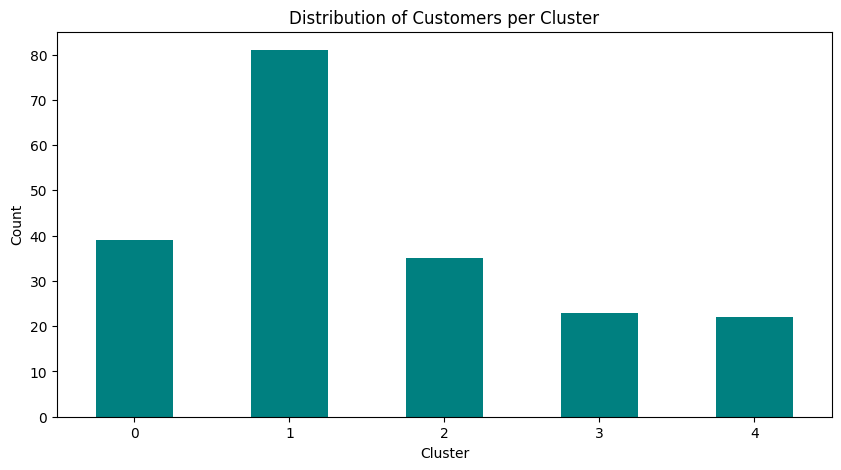

In [ ]:
# Plot customer cluster counts

plt.figure(figsize=(10, 5))
cluster_counts.plot(kind='bar', color='teal')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Distribution of Customers per Cluster')
plt.xticks(rotation=0)
plt.show()

**Now** we want to identify the attributes of each customer segment

In [ ]:
cluster_characteristics = df_clustered.groupby('predicted_cluster')[
    ['Annual Income (k$)', 'Spending Score (1-100)']].mean()
cluster_characteristics

,Annual Income (k$),Spending Score (1-100)
predicted_cluster,,
0,86.538462,82.128205
1,55.296296,49.518519
2,88.200000,17.114286
3,26.304348,20.913043
4,25.727273,79.363636


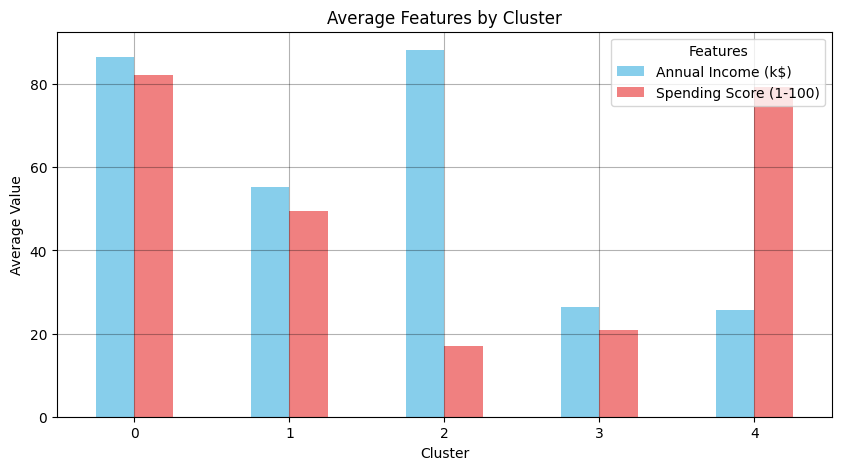

In [ ]:
# Plot customer characteristics

fig, axes = plt.subplots(figsize=(10, 5))
cluster_characteristics.plot(kind='bar', ax=axes,
                             color=['skyblue', 'lightcoral'])
axes.set_xlabel('Cluster')
axes.set_ylabel('Average Value')
axes.set_title('Average Features by Cluster')
axes.tick_params(axis='x', rotation=0)
axes.legend(title='Features')
axes.grid(True, color='k', alpha=0.3)
plt.show()

**Observation:**

*Five* distinct customer clusters were identified with the following attributes:

| Cluster | Avg. Annual Income (k$) | Avg. Spending Score (1-100) | Description |
|:---:|:---:|:---:|:---|
| `0` | 86.54 | 82.13 | High income & high spending |
| `1` | 55.30 | 49.52 | Moderate income & moderate spending |
| `2` | 88.20 | 17.11 | High income & low spending |
| `3` | 26.30 | 20.91 | Low income & low spending |
| `4` | 25.73 | 79.36 | Low income & high spending |

**Extra:**

Let's focus on the high-spending clusters `(0 & 4)` to identify *Age* and *Gender* distribution

In [ ]:
high_spending_df = df_clustered[df_clustered['predicted_cluster'].isin([0, 4])]
high_spending_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),predicted_cluster
1,2,Male,21,15,81,4
3,4,Female,23,16,77,4
5,6,Female,22,17,76,4
7,8,Female,23,18,94,4
9,10,Female,30,19,72,4


In [ ]:
high_spending_df.shape

(61, 6)

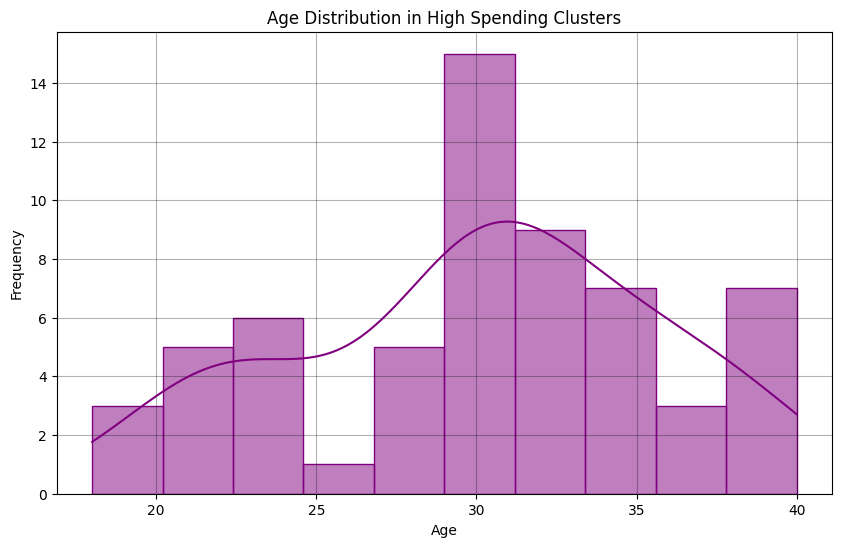

In [ ]:
# Visualize Age distribution for high spenders

plt.figure(figsize=(10, 6))
sns.histplot(high_spending_df['Age'], bins=10,
             kde=True, color='purple', ec='purple')
plt.title('Age Distribution in High Spending Clusters')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True, color='k', alpha=0.3)
plt.show()

**Observation:**

- The young adults are the majority of the high spenders

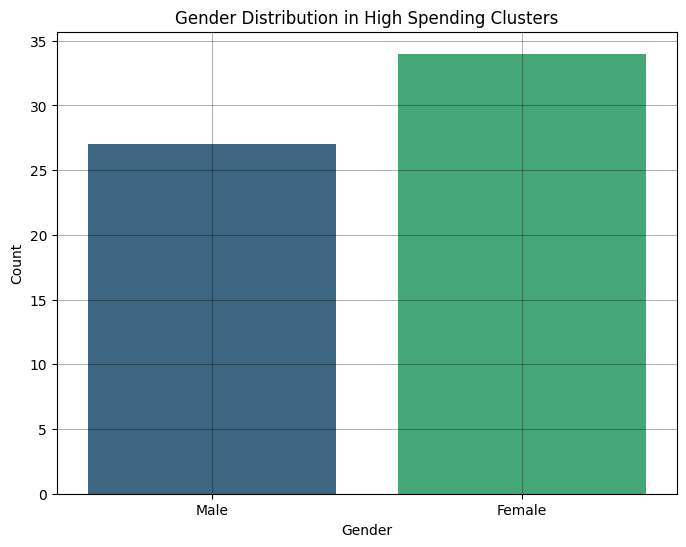

In [ ]:
# Visualize Gender distribution for high spenders

plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Gender', data=high_spending_df,
              palette='viridis', legend=False)
plt.title('Gender Distribution in High Spending Clusters')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(True, color='k', alpha=0.3)
plt.show()

**Observation:**

- `Females` are the majority of the high spenders

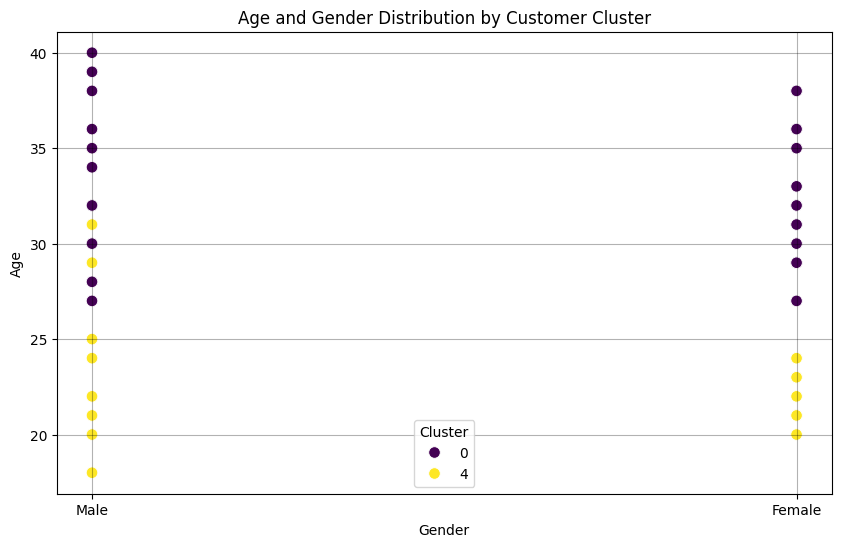

In [ ]:
# Visualize Age and Gender distribution for high spenders

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Gender', y='Age', hue='predicted_cluster',
                data=high_spending_df, palette='viridis', s=70)
plt.title('Age and Gender Distribution by Customer Cluster')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.grid(True, color='k', alpha=0.3)
plt.legend(title='Cluster')
plt.show()

**Observation:**

- Low earners *and high spenders* are much younger `(Cluster 4)`
- High earners *and high spenders* are older `(Cluster 0)`